<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# AI in Finance

**Workshop at Texas State University (October 2023)**

**_Financial Data APIs_**

Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

## EODHistoricalData

The following requires an account for [EODHistoricalData](https://bit.ly/eod_data).

You need to generate/use an API key to execute the following code.

I have created a simple Python file to store my credentials that looks as follows:

In [1]:
!cat creds.cfg_

eod_key = "YOUR_EOD_KEY"
openai_key = "YOUR_OPENAI_KEY"

You can then import our `tpqeod` wrapper:

**IMPORTANT**: The EOD Python wrapper class/package is work-in-progress. Significant changes are possible. The following is only for illustration purposes.

In [2]:
from tpqeod import tpqeod

In [3]:
# adjust the path to your file
%run ../creds.py

In [4]:
api = tpqeod(eod_key)

## Getting AdjClose for Multiple Stocks

In [5]:
import pandas as pd

In [6]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'NFLX', 'META', 'GOOG',
           'INTC', 'AMD', 'NVDA', 'GE', 'GS', 'BAC', 'JPM', 'MS' ]

In [7]:
prices = pd.DataFrame()
for ticker in tickers:
    print(ticker)
    d = api.get_eod_data(ticker, start=pd.Timestamp('2014-7-1'))
    prices[ticker]=d['Adjusted_close']

AAPL
MSFT
AMZN
NFLX
META
GOOG
INTC
AMD
NVDA
GE
GS
BAC
JPM
MS


In [8]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2349 entries, 2014-07-01 to 2023-10-27
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2349 non-null   float64
 1   MSFT    2349 non-null   float64
 2   AMZN    2349 non-null   float64
 3   NFLX    2349 non-null   float64
 4   META    2349 non-null   float64
 5   GOOG    2349 non-null   float64
 6   INTC    2349 non-null   float64
 7   AMD     2349 non-null   float64
 8   NVDA    2349 non-null   float64
 9   GE      2349 non-null   float64
 10  GS      2349 non-null   float64
 11  BAC     2349 non-null   float64
 12  JPM     2349 non-null   float64
 13  MS      2349 non-null   float64
dtypes: float64(14)
memory usage: 275.3 KB


In [9]:
prices.iloc[-7:, 3:7]

,NFLX,META,GOOG,INTC
Date,,,,
2023-10-19,401.77,312.81,138.98,35.67
2023-10-20,400.96,308.65,136.74,34.92
2023-10-23,406.84,314.01,137.90,33.85
2023-10-24,413.73,312.55,140.12,34.59
2023-10-25,411.25,299.53,126.67,32.83
2023-10-26,403.54,288.35,123.44,32.52
2023-10-27,397.87,296.73,123.40,35.54


In [10]:
from pylab import plt
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format='svg' 

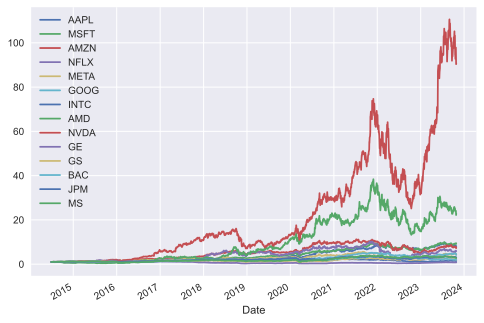

In [11]:
(prices / prices.iloc[0]).plot();

In [12]:
# prices.to_csv('../sources/eod_prices.csv')

## Getting Fundamentals for Multiple Stocks

In [13]:
import warnings as w; w.simplefilter('ignore')

In [14]:
fundamentals = pd.DataFrame()
for ticker in tickers:
    print(ticker)
    f = api.get_fundamentals(ticker, as_json=True)
    fundamentals=pd.concat((fundamentals, pd.DataFrame(f['Highlights'],
                                                         index=[ticker])))

AAPL
MSFT
AMZN
NFLX
META
GOOG
INTC
AMD
NVDA
GE
GS
BAC
JPM
MS


In [15]:
fundamentals.T.iloc[:, 5:10]

,GOOG,INTC,AMD,NVDA,GE
MarketCapitalization,1536753926144,137492054016,151339810816,1031941390336,121028968448
MarketCapitalizationMln,1536753.9261,137492.054,151339.8108,1031941.3903,121028.9684
EBITDA,93340999680,8780000256,3100000000,12378999808,12026000384
PERatio,23.6475,NaN,NaN,101.1598,11.5713
PEGRatio,1.3438,12.6852,0.9019,4.0412,0.7414
WallStreetTargetPrice,135.34,33.59,129.11,594.21,125.83
BookValue,21.785,24.121,34.161,11.049,26.337
DividendShare,0.0,1.22,0.0,0.16,0.32
DividendYield,0.0,0.0145,0.0116,0.0004,0.0029
EarningsShare,5.22,-0.23,-0.04,4.13,9.61


In [16]:
# fundamentals.T.to_csv('../sources/eod_fundamentals.csv')

## Fundamentals for Complete Index

In [17]:
dax_constituents = api.get_fundamentals(symbol='GDAXI', exchange='INDX', table='Components')

In [18]:
dax_constituents.head()

,Code,Exchange,Name,Sector,Industry
0,RWE,XETRA,RWE AG,Utilities,Utilities - Diversified
1,FRE,XETRA,Fresenius SE & Co. KGaA,Healthcare,Medical Care Facilities
2,DB1,XETRA,Deutsche Börse AG,Financial Services,Financial Data & Stock Exchanges
3,ALV,XETRA,Allianz SE VNA O.N.,Financial Services,Insurance - Diversified
4,DHL,XETRA,Deutsche Post AG,Industrials,Integrated Freight & Logistics


In [19]:
highlights=list()
for ticker in dax_constituents['Code']:
    print(ticker, end=' ' )
    highlights.append(api.get_fundamentals(symbol=ticker,
                                           exchange='XETRA',
                                           table='Highlights'))

RWE FRE DB1 ALV DHL MUV2 ADS MRK DTE DBK RHM SAP SY1 CBK SIE BAYN BNR MBG HEI QIA CON BEI BAS BMW IFX EOAN MTX HNR1 PAH3 VOW3 HEN3 SRT3 ZAL VNA 1COV AIR SHL ENR DTG P911 

In [20]:
dax_fundamentals = pd.DataFrame(highlights, index=dax_constituents['Code'])

In [21]:
dax_fundamentals.T.iloc[:, 5:10]

Code,MUV2,ADS,MRK,DTE,DBK
MarketCapitalization,51473776640,29721266176,62868897792,101368496128,20856532992
MarketCapitalizationMln,51473.7766,29721.2662,62868.8978,101368.4961,20856.533
EBITDA,2724999936.0,669000000.0,6226999808.0,35918000128.0,NaN
PERatio,18.408,NaN,20.3949,18.3649,4.6133
PEGRatio,0.1935,4.9864,3.0897,0.9661,0.1218
WallStreetTargetPrice,384.4,188.3,196.4,25.4,13.3
BookValue,200.554,26.827,61.443,11.988,34.614
DividendShare,11.6,0.7,2.2,0.7,0.3
DividendYield,0.0303,0.0041,0.0152,0.0342,0.0292
EarningsShare,20.54,-1.94,7.09,1.11,2.25


In [22]:
# dax_fundamentals.T.to_csv('../sources/eod_dax_fundamentals.csv')

## Available Exchanges

In [23]:
print(sorted(api.get_exchange_codes()))

['AS', 'AT', 'AU', 'BA', 'BC', 'BE', 'BK', 'BR', 'BRVM', 'BUD', 'CC', 'CM', 'CO', 'DSE', 'DU', 'EGX', 'EUFUND', 'F', 'FOREX', 'GSE', 'HA', 'HE', 'HM', 'IC', 'IL', 'IR', 'IS', 'JK', 'JSE', 'KAR', 'KLSE', 'KO', 'KQ', 'LIM', 'LS', 'LSE', 'LU', 'LUSE', 'MC', 'MCX', 'MONEY', 'MSE', 'MU', 'MX', 'NEO', 'NSE', 'OL', 'PA', 'PR', 'PSE', 'RO', 'RSE', 'SA', 'SEM', 'SHE', 'SHG', 'SN', 'SR', 'ST', 'STU', 'SW', 'TA', 'TO', 'TW', 'TWO', 'US', 'USE', 'V', 'VFEX', 'VI', 'VN', 'WAR', 'XBOT', 'XETRA', 'XNAI', 'XNSA', 'XZIM', 'ZSE']


## Fundamentals for Exchanges

In [24]:
api.get_exchange_data('ZSE')

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
ZSE,Zagreb Stock Exchange,ZSE,XZAG,Croatia,EUR,HR,HRV


In [25]:
api.get_exchange_data('BE')

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
BE,Berlin Exchange,BE,XBER,Germany,EUR,DE,DEU


In [26]:
api.get_exchange_data('All')

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
0,USA Stocks,US,"XNAS, XNYS",USA,USD,US,USA
1,London Exchange,LSE,XLON,UK,GBP,GB,GBR
2,NEO Exchange,NEO,NEOE,Canada,CAD,CA,CAN
3,TSX Venture Exchange,V,XTSX,Canada,CAD,CA,CAN
4,Toronto Exchange,TO,XTSE,Canada,CAD,CA,CAN
...,...,...,...,...,...,...,...
73,Money Market Virtual Exchange,MONEY,None,Unknown,Unknown,,
74,Europe Fund Virtual Exchange,EUFUND,None,Unknown,EUR,,
75,Istanbul Stock Exchange,IS,XIST,Turkey,TRY,TR,TUR
76,FOREX,FOREX,CDSL,Unknown,Unknown,,


## Available Tickers for an Exchange

In [27]:
api.get_ticker_list('ZSE')

,Code,Name,Country,Exchange,Currency,Type,Isin
0,ADPL,AD Plastik d.d.,Croatia,ZSE,EUR,Common Stock,None
1,ADRS,Adris Grupa d.d.,Croatia,ZSE,EUR,Common Stock,None
2,ADRS2,Adris Grupa d.d. Pfd.,Croatia,ZSE,EUR,Common Stock,None
3,ARNT,Arena Hospitality Group d.d.,Croatia,ZSE,EUR,Common Stock,None
4,ATGR,Atlantic Grupa d.d.,Croatia,ZSE,EUR,Common Stock,None
5,ATPL,Atlantska Plovidba d.d.,Croatia,ZSE,EUR,Common Stock,None
6,DDJH,Djuro Djakovic Grupa d.d.,Croatia,ZSE,EUR,Common Stock,None
7,DLKV,Dalekovod d.d.,Croatia,ZSE,EUR,Common Stock,None
8,ERNT,Ericsson Nikola Tesla d.d.,Croatia,ZSE,EUR,Common Stock,None
9,HPB,Hrvatska Postanska Banka d.d.,Croatia,ZSE,EUR,Common Stock,None


## Searching for an Symbol

In [28]:
api.search('tesla', limit=25, asset_type='all' )

,Code,Exchange,Name,Type,Country,Currency,ISIN,previousClose,previousCloseDate
0,TSLA,US,Tesla Inc,Common Stock,USA,USD,US88160R1014,207.3000,2023-10-27
1,3STP,LSE,GraniteShares 3x Short Tesla Daily ETP,ETF,UK,GBX,XS2193972671,1933.7500,2023-10-26
2,3TSL,LSE,Leverage Shares 3x Tesla ETP Scs,ETF,UK,GBX,XS2297549128,14.7000,2023-10-27
3,3STS,LSE,GraniteShares 3x Short Tesla Daily ETP,ETF,UK,USD,None,22.9000,2023-10-27
4,TL0,XETRA,Tesla Inc,Common Stock,Germany,EUR,US88160R1014,197.5800,2023-10-27
5,TSLQ,LSE,Leverage Shares -3x Short Tesla ETP Securities...,ETF,UK,GBX,None,2.4701,2023-10-27
6,2TSL,LSE,Leverage Shares 2x Tesla ETP Scs,ETF,UK,GBX,None,9752.5000,2023-10-27
7,TSLA,MX,Tesla Inc,Common Stock,Mexico,MXN,None,3743.0701,2023-10-26
8,TSL3,LSE,Leverage Shares 3x Tesla ETP Securities,ETF,UK,USD,XS2297549128,0.1762,2023-10-27
9,TSLA,NEO,Tesla Inc CDR,Common Stock,Canada,CAD,CA88162R1091,19.1400,2023-10-26


## Economic Calendar for historic and upcoming events

In [29]:
import datetime as dt

In [30]:
api.get_calendar('splits', start=dt.datetime(2023, 10, 1), stop=dt.datetime(2023, 10, 31))

,Code,Split_Date,Optionable,Old_Shares,New_Shares
0,1303.SR,2023-10-01,N,1,20
1,9568.SR,2023-10-01,N,1,20
2,2320.SR,2023-10-01,N,2,3
3,GHU.MU,2023-10-02,N,10,1
4,HDM.DU,2023-10-02,N,1,3
...,...,...,...,...,...
290,H5O.F,2023-10-30,N,1000,1
291,155900.KO,2023-10-31,N,1,0
292,1449.TW,2023-10-31,N,1000,1029
293,397030.KO,2023-10-31,N,1,2


The following events are available:
 - earnings
 - ipos
 - splits
 
 Data can restricted to one ticker by providing the symbol as parameter.
 If start or stop date is ommited, the present day is used as start date and the present day plus 7 days is used as stop date.

## Historic splits and dividends

In [31]:
api.get_hist_splits("AAPL", exchange='US', start=dt.datetime(2000, 1, 1))

,Stock Splits
Date,
2000-06-21,2.000000/1.000000
2005-02-28,2.000000/1.000000
2014-06-09,7.000000/1.000000
2020-08-31,4.000000/1.000000


In [32]:
api.get_hist_dividends("AAPL", exchange='US')

,Dividends
Date,
1987-05-11,0.00054
1987-08-10,0.00054
1987-11-17,0.00071
1988-02-12,0.00071
1988-05-16,0.00071
...,...
2022-08-05,0.23000
2022-11-04,0.23000
2023-02-10,0.23000


## Historical Tick Data

In [34]:
%%time
ticks = api.get_tick_data('AAPL', start=dt.datetime(2023, 10, 26, 0, 0, 0),
                         stop=dt.datetime(2023, 10, 26, 23, 59, 59))

CPU times: user 987 ms, sys: 376 ms, total: 1.36 s
Wall time: 18.4 s


Please note: get_tick_data is available only for 'US' exchanges.

In [35]:
ticks.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 813645 entries, (Timestamp('2023-10-26 05:00:42.741000'),) to (Timestamp('2023-10-26 19:59:58.901000'),)
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ex       813645 non-null  object 
 1   mkt      813645 non-null  object 
 2   price    813645 non-null  float64
 3   seq      813645 non-null  int64  
 4   shares   813645 non-null  int64  
 5   sl       813645 non-null  object 
 6   sub_mkt  813645 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 65.8+ MB


In [36]:
ticks.head()

,ex,mkt,price,seq,shares,sl,sub_mkt
2023-10-26 05:00:42.741,Q,K,169.00,1650497,19,@ TI,
2023-10-26 05:00:48.844,Q,P,168.99,1652096,100,@ T,
2023-10-26 05:00:53.093,Q,P,169.00,1653367,25,@ TI,
2023-10-26 05:00:59.862,Q,P,169.00,1655299,200,@FT,
2023-10-26 05:00:59.862,Q,P,169.00,1655303,187,@FT,


## Technical Indicators

In [37]:
mavg = api.get_technical_indicator('AMZN', 'US', function='sma', period=7,
                                   start=dt.datetime(2022, 1, 1),
                                   stop=dt.datetime(2022, 12, 31))

In [38]:
mavg.head()

,Sma
Date,
2022-01-11,164.9914
2022-01-12,164.2489
2022-01-13,163.3477
2022-01-14,163.0307
2022-01-18,162.4112


In [39]:
prices = api.get_eod_data('AMZN', 'US', start=dt.datetime(2022, 1, 11),
                        stop=dt.datetime(2022, 12, 31))['Adjusted_close']

In [40]:
prices.head()

Date
2022-01-11    165.3620
2022-01-12    165.2070
2022-01-13    161.2140
2022-01-14    162.1380
2022-01-18    158.9175
Name: Adjusted_close, dtype: float64

In [41]:
data = pd.concat([prices, mavg], axis=1)

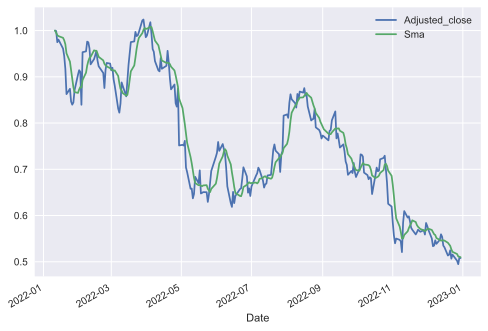

In [42]:
(data / data.iloc[0]).plot();

Available values for the indicator function are: `'splitadjusted', 'avgvol', 'avgvolccy', 'sma', 'ema', 'wma', 'volatility', 'rsi', 'stddev', 'stochastic', 'stochrsi', 'slope', 'dmi', 'adx', 'macd', 'atr', 'cci', 'sar' and 'bbands'`.

See also https://eodhd.com/financial-apis/technical-indicators-api/

## Live Tick Data (stream)

In [43]:
import time

In [44]:
api.get_live_crypto_data('ETH-USD')

The data is stored in the attribute crypto_data

In [45]:
time.sleep(5)
api.crypto_data

{'ETH-USD':                                s              p           q       dc        dd
 2023-10-27 21:26:18.813  ETH-USD  1781.55008418  1.24245028  -1.2256  -21.8343
 2023-10-27 21:26:19.088  ETH-USD  1781.55031987  1.24245028  -1.2256   -21.834
 2023-10-27 21:26:19.111  ETH-USD  1781.55031987  1.24245028  -1.2256   -21.834
 2023-10-27 21:26:19.421  ETH-USD  1781.55763047  1.32886165  -1.2251  -21.8267
 2023-10-27 21:26:19.521  ETH-USD  1781.55763047  1.32886165  -1.2251  -21.8267
 2023-10-27 21:26:19.667  ETH-USD  1781.55763047  1.32886165  -1.2251  -21.8267
 2023-10-27 21:26:19.821  ETH-USD  1781.55763047  1.32886165  -1.2251  -21.8267
 2023-10-27 21:26:19.842  ETH-USD  1781.55763047  1.31126387  -1.2251  -21.8267
 2023-10-27 21:26:19.938  ETH-USD  1781.55763047  1.31126387  -1.2251  -21.8267
 2023-10-27 21:26:20.081  ETH-USD  1781.55763047  1.31126387  -1.2251  -21.8267
 2023-10-27 21:26:20.090  ETH-USD  1781.55763047  1.31126387  -1.2251  -21.8267
 2023-10-27 21:26:20.253  ETH

That attribute is a dictionary containing the DataFrame as value and the according symbol as key and can hold data for several symbols. 

In [46]:
api.get_live_crypto_data('BTC-USD')

In [47]:
time.sleep(5)
api.crypto_data

{'ETH-USD':                                s              p            q       dc  \
 2023-10-27 21:26:18.813  ETH-USD  1781.55008418   1.24245028  -1.2256   
 2023-10-27 21:26:19.088  ETH-USD  1781.55031987   1.24245028  -1.2256   
 2023-10-27 21:26:19.111  ETH-USD  1781.55031987   1.24245028  -1.2256   
 2023-10-27 21:26:19.421  ETH-USD  1781.55763047   1.32886165  -1.2251   
 2023-10-27 21:26:19.521  ETH-USD  1781.55763047   1.32886165  -1.2251   
 ...                          ...            ...          ...      ...   
 2023-10-27 21:26:58.200  ETH-USD  1780.76044572  10.18733492  -1.2705   
 2023-10-27 21:26:58.336  ETH-USD  1780.76044572  10.18733492  -1.2705   
 2023-10-27 21:26:58.490  ETH-USD  1780.76044572  10.18733492  -1.2705   
 2023-10-27 21:26:58.544  ETH-USD  1780.76044572  10.18733492  -1.2705   
 2023-10-27 21:26:58.716  ETH-USD  1780.76044572  10.18733492  -1.2705   
 
                                dd  
 2023-10-27 21:26:18.813  -21.8343  
 2023-10-27 21:26:19.088 

In [48]:
api.crypto_data['BTC-USD']

,s,p,q,dc,dd
2023-10-27 21:26:52.356,BTC-USD,33797.67377946,0.11151014,-1.0409,-351.7872
2023-10-27 21:26:52.472,BTC-USD,33797.67377946,0.20243214,-1.0409,-351.7872
2023-10-27 21:26:52.482,BTC-USD,33797.67377946,0.20243214,-1.0409,-351.7872
2023-10-27 21:26:52.754,BTC-USD,33797.67377946,0.20243214,-1.0409,-351.7872
2023-10-27 21:26:52.814,BTC-USD,33797.67377946,0.20241777,-1.0409,-351.7872
...,...,...,...,...,...
2023-10-27 21:27:12.087,BTC-USD,33794.51776659,0.13330124,-1.0503,-354.9432
2023-10-27 21:27:12.129,BTC-USD,33794.51776659,0.13330124,-1.0503,-354.9432
2023-10-27 21:27:12.284,BTC-USD,33794.51776659,0.13330124,-1.0503,-354.9432
2023-10-27 21:27:12.504,BTC-USD,33794.51776659,0.13356764,-1.0503,-354.9432


In [49]:
api.close_crypto_stream()

There are further streams for:
 - forex data: get_live_forex_data(symbol)
 - trade data: get_live_trade_data(symbol)
 - quote data: get_live_quote_data(symbol)

<img src='http://hilpisch.com/tpq_logo.png' width="35%" align="right">

<br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">ai@tpq.io</a>